In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化后数据集合.xlsx')
label1 = np.array(features['循环应力'])
features = features.drop(['循环应力', '失效反向数'], axis=1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建SVR模型并设置参数 
model_svr = SVR(kernel='rbf', C=61100, gamma=1.6,epsilon=0.1111)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_svr = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_svr.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_svr.predict(data_x4[test_index])
    r2_svr.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_svr)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_svr = cross_val_predict(model_svr, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_svr, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

10折交叉验证平均R2值: 0.91
10折交叉验证平均MAPE值: 4.91


In [3]:
# 读取新数据
new_data = pd.read_excel('实验验证数据库.xlsx')
# 提取特征和标签
new_features = new_data.drop(['循环应力', '疲劳寿命'], axis=1)
new_label = np.array(new_data['循环应力'])
new_features_normalized = new_features
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(new_features_normalized)
# 预测
new_predictions = model_svr.predict(features_normalized)

# 计算评价指标
mape_new_data = mape_function(new_predictions, new_label)
# 输出结果
print(f'MAPE on new data: {mape_new_data:.2f}')

MAPE on new data: 6.48


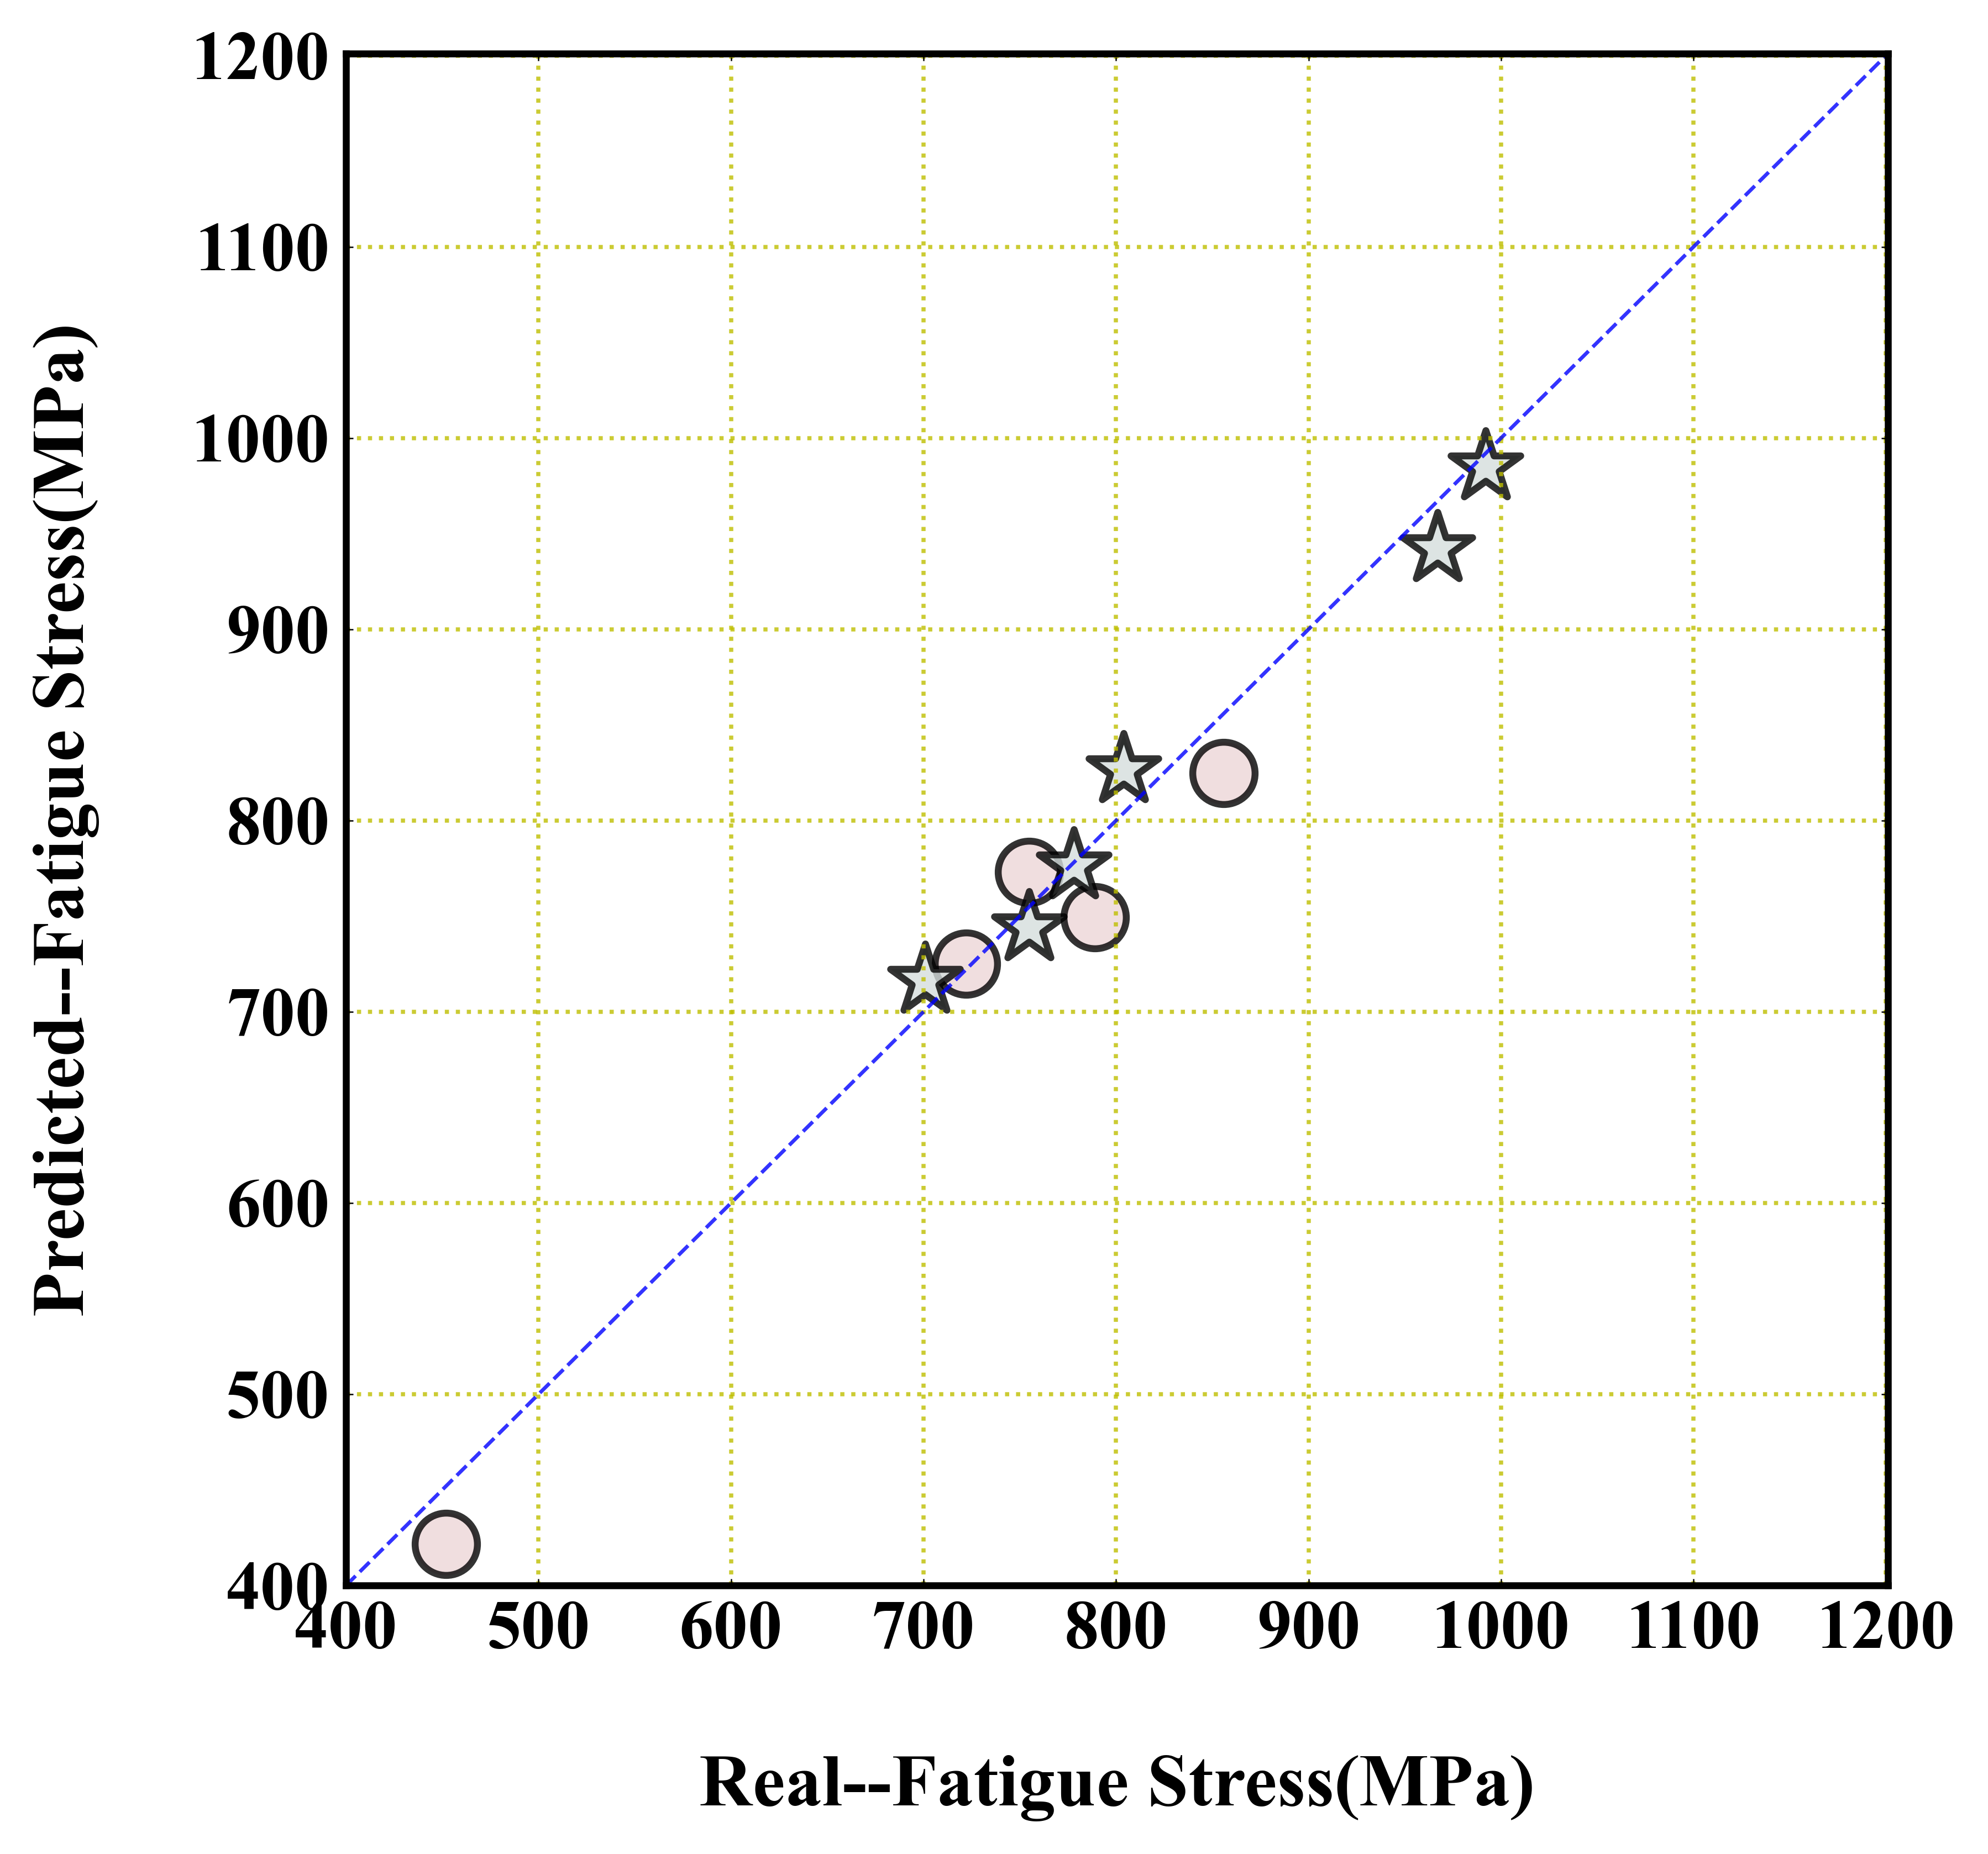

In [5]:
new_predictions=[725.14530427, 749.29686868, 824.77847075, 772.97303201,
       421.60777717
       ]
new_label=[722.  , 789.  , 856.  , 755.  ,  452 
        ]
new_predictions1=[
       716.47902632, 776.29005318, 826.49401386,942,985,744]
new_label1=[
       701.  , 778.  , 804.,967,992,755  ]
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
# Set plot parameters
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

# Customize plot borders
ax = plt.axes()
ax.set_facecolor("white")
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color

# Set ticks
new_ticks = list(np.arange(400, 1201, 100))
plt.xticks(new_ticks, fontsize=15, weight='bold', fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=15, weight='bold', fontname='Times New Roman')

# Scatter plot
plt.scatter(new_label, new_predictions, alpha=0.8, s=183, linewidths=1.5, c='#edd6d7',
            edgecolor='#000000', marker='o')
plt.scatter(new_label1, new_predictions1, alpha=0.8, s=253, linewidths=1.5, c='#d5dedd',
            edgecolor='#000000', marker='*')

# Plot lines
plt.plot([400, 1201], [400, 1201], 'b--', linewidth='0.8', alpha=0.8)

# Set limits
plt.ylim(400, 1201)
plt.xlim(400, 1201)

plt.tick_params(which='major', direction='in', length=1.5, width=0.3, color='red', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Real--Fatigue Stress(MPa)', size=16, weight='bold', labelpad=20, fontname='Times New Roman')
plt.ylabel('Predicted--Fatigue Stress(MPa)', size=16, weight='bold', labelpad=20, fontname='Times New Roman')
#plt.text(1620, 200, 'SVR', fontsize=20, weight='bold', fontname='Times New Roman')  # Add text
plt.show()